In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

This dataset contains 7752 records and 25 features.

In [5]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


From the above we can observe 'Date' feature is in the data format. Let's divide that column into date, month, year.

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


In [7]:
df.shape

(7752, 27)

New dataset contains 7752 records and 27 features.

Let's check for nulls in the dataset.

In [8]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

Nulls are present in the features. Let's fill those null values.

In [9]:
df['station'].value_counts()

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

In [10]:
df['station'].mode()[0]

1.0

In [11]:
df['station']=df['station'].fillna(df['station'].mode()[0])

In [12]:
df['Present_Tmax'].value_counts()

31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64

In [13]:
df['Present_Tmax'].mean()

29.76821140328037

In [14]:
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

In [15]:
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

In [16]:
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

In [17]:
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

In [18]:
df['LDAPS_WS'].value_counts()

21.857621    2
2.882580     2
6.818887     1
7.772403     1
8.412426     1
            ..
6.411772     1
5.889227     1
6.131082     1
6.425350     1
7.289264     1
Name: LDAPS_WS, Length: 7675, dtype: int64

In [19]:
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())

df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())

df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())

df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())

df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())

df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

df['Day']=df['Day'].fillna(df['Day'].mode()[0])

df['Month']=df['Month'].fillna(df['Month'].mode()[0])

df['Year']=df['Year'].fillna(df['Year'].mode()[0])

TASK - 1 (FINDING NEXT_TMIN )

In [20]:
df1=pd.DataFrame()
df1=df
df1['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

Since null values in target variable should not be imputed, let's drop records containing null values.

In [21]:
df1.dropna(axis=0,inplace=True)

In [22]:
df1.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

Let's check for duplicates in the dataset.

In [23]:
df1.duplicated().sum()

0

Duplicate records are not present in the dataset.

Let's check for statistical information of the dataset.

In [24]:
df1.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,...,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000
mean,13.005049,29.769552,23.224635,56.741576,88.369195,29.616226,23.511815,7.096750,62.468953,0.368485,...,37.544755,126.991370,61.926856,1.258725,5342.066031,30.274887,22.932220,16.369061,7.079612,2014.996893
std,7.215687,2.959205,2.405561,14.583630,7.164028,2.932271,2.333987,2.171835,33.556340,0.261052,...,0.050386,0.079347,54.331701,1.371331,429.235277,3.128010,2.487613,8.242621,2.238210,1.414027
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.045017,84.291199,27.696185,22.114277,5.686496,37.452979,0.148229,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.266701,89.699196,29.664030,23.733589,6.564141,57.299645,0.319678,...,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,66.996681,93.704353,31.687106,25.135301,7.996899,83.897461,0.571547,...,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7725 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7725 non-null   float64
 1   Present_Tmax      7725 non-null   float64
 2   Present_Tmin      7725 non-null   float64
 3   LDAPS_RHmin       7725 non-null   float64
 4   LDAPS_RHmax       7725 non-null   float64
 5   LDAPS_Tmax_lapse  7725 non-null   float64
 6   LDAPS_Tmin_lapse  7725 non-null   float64
 7   LDAPS_WS          7725 non-null   float64
 8   LDAPS_LH          7725 non-null   float64
 9   LDAPS_CC1         7725 non-null   float64
 10  LDAPS_CC2         7725 non-null   float64
 11  LDAPS_CC3         7725 non-null   float64
 12  LDAPS_CC4         7725 non-null   float64
 13  LDAPS_PPT1        7725 non-null   float64
 14  LDAPS_PPT2        7725 non-null   float64
 15  LDAPS_PPT3        7725 non-null   float64
 16  LDAPS_PPT4        7725 non-null   float64


All features are of float type only.

Let's check for graphical information of the data.

In [26]:
df1.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

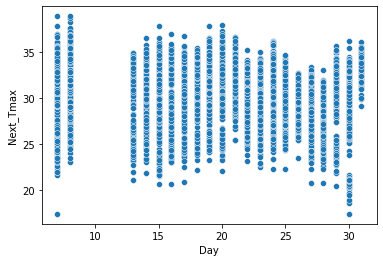

In [27]:
sns.scatterplot(x='Day',y='Next_Tmax',data=df1)
plt.xlabel('Day')
plt.ylabel('Next_Tmax')
plt.show()

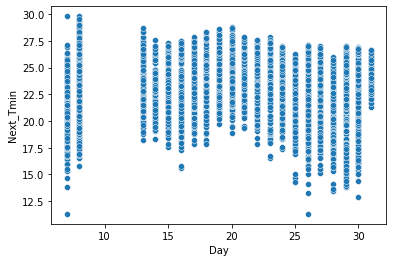

In [28]:
sns.scatterplot(x='Day',y='Next_Tmin',data=df1)
plt.xlabel('Day')
plt.ylabel('Next_Tmin')
plt.show()

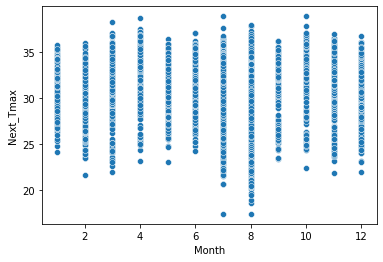

In [29]:
sns.scatterplot(x='Month',y='Next_Tmax',data=df1)
plt.xlabel('Month')
plt.ylabel('Next_Tmax')
plt.show()

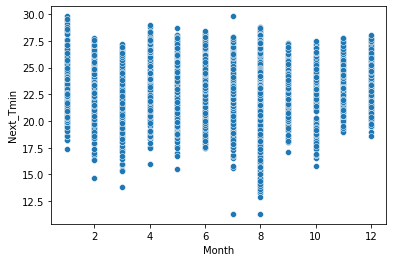

In [30]:
sns.scatterplot(x='Month',y='Next_Tmin',data=df1)
plt.xlabel('Month')
plt.ylabel('Next_Tmin')
plt.show()

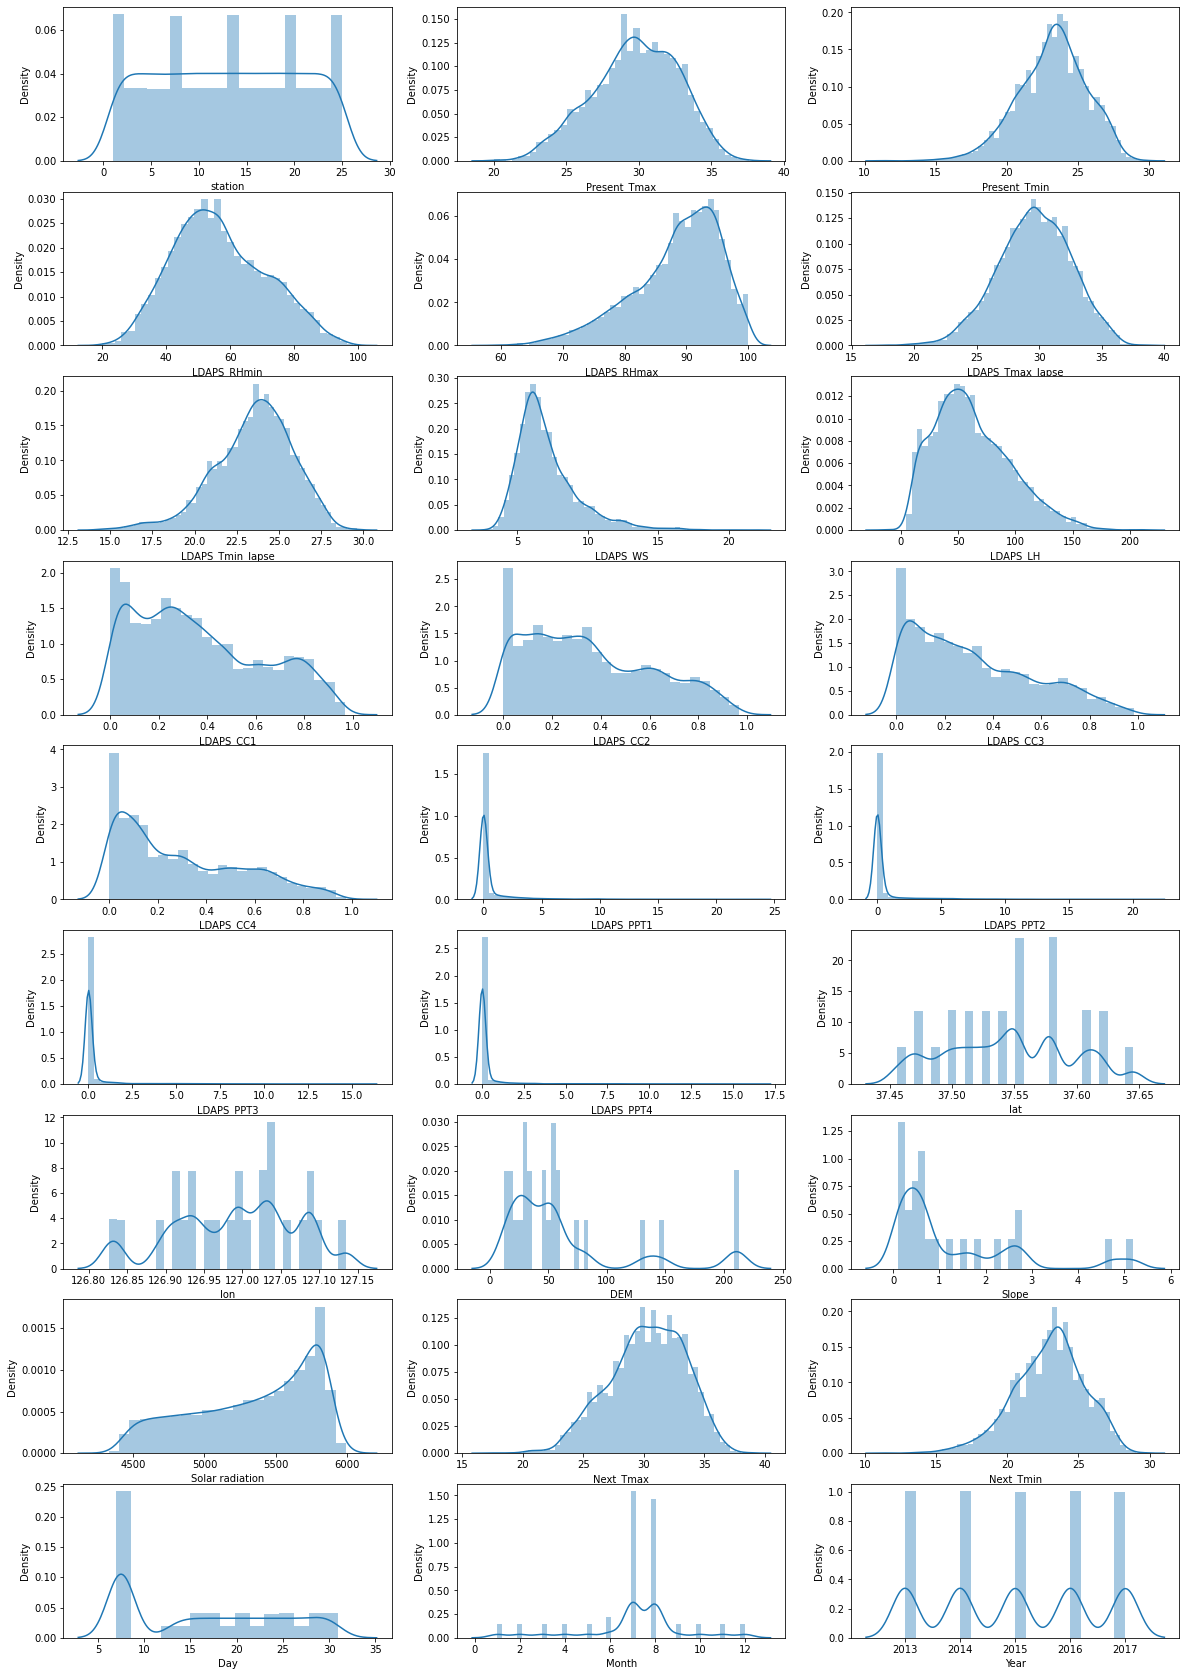

In [31]:
n=1
plt.figure(figsize=(20,30))

for i in df1.columns:
    ax=plt.subplot(9,3,n)
    sns.distplot(x=df1[i])
    plt.xlabel(i)
    n=n+1
    
plt.show()    

In [32]:
df1.skew()

station            -0.002671
Present_Tmax       -0.264750
Present_Tmin       -0.366521
LDAPS_RHmin         0.302959
LDAPS_RHmax        -0.854116
LDAPS_Tmax_lapse   -0.227408
LDAPS_Tmin_lapse   -0.580647
LDAPS_WS            1.581465
LDAPS_LH            0.673019
LDAPS_CC1           0.460552
LDAPS_CC2           0.475215
LDAPS_CC3           0.642222
LDAPS_CC4           0.666281
LDAPS_PPT1          5.399231
LDAPS_PPT2          5.782954
LDAPS_PPT3          6.469458
LDAPS_PPT4          6.833841
lat                 0.086587
lon                -0.286558
DEM                 1.721056
Slope               1.560549
Solar radiation    -0.513787
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Day                 0.245795
Month              -0.704300
Year                0.002471
dtype: float64

From the above we can observe skewness value is not in range for the features LDAPS_RHmax, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope. Since Month is categorical column lets not reduce skeweness for this column.

In [33]:

from scipy.stats import boxcox
df1['LDAPS_RHmax']=boxcox(df1['LDAPS_RHmax'])[0]

df1['LDAPS_WS']=np.cbrt(df1['LDAPS_WS'])
df1['LDAPS_WS']=np.cbrt(df1['LDAPS_WS'])

df1['LDAPS_LH']=np.cbrt(df1['LDAPS_LH'])

df1['LDAPS_CC3']=np.cbrt(df1['LDAPS_CC3'])

df1['LDAPS_CC4']=np.cbrt(df1['LDAPS_CC4'])

df1['LDAPS_PPT1']=np.cbrt(df1['LDAPS_PPT1'])
df1['LDAPS_PPT1']=np.cbrt(df1['LDAPS_PPT1'])
df1['LDAPS_PPT1']=np.cbrt(df1['LDAPS_PPT1'])

df1['LDAPS_PPT2']=np.cbrt(df1['LDAPS_PPT2'])
df1['LDAPS_PPT2']=np.cbrt(df1['LDAPS_PPT2'])
df1['LDAPS_PPT2']=np.cbrt(df1['LDAPS_PPT2'])

df1['LDAPS_PPT3']=np.cbrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT3']=np.cbrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT3']=np.cbrt(df1['LDAPS_PPT3'])

df1['LDAPS_PPT4']=np.cbrt(df1['LDAPS_PPT4'])
df1['LDAPS_PPT4']=np.cbrt(df1['LDAPS_PPT4'])
df1['LDAPS_PPT4']=np.cbrt(df1['LDAPS_PPT4'])


df1['DEM']=np.cbrt(df1['DEM'])
df1['Slope']=np.cbrt(df1['Slope'])
df1.skew()

station            -0.002671
Present_Tmax       -0.264750
Present_Tmin       -0.366521
LDAPS_RHmin         0.302959
LDAPS_RHmax        -0.116045
LDAPS_Tmax_lapse   -0.227408
LDAPS_Tmin_lapse   -0.580647
LDAPS_WS            0.678491
LDAPS_LH           -0.415327
LDAPS_CC1           0.460552
LDAPS_CC2           0.475215
LDAPS_CC3          -0.571865
LDAPS_CC4          -0.468168
LDAPS_PPT1          0.563036
LDAPS_PPT2          0.743135
LDAPS_PPT3          0.828504
LDAPS_PPT4          1.145049
lat                 0.086587
lon                -0.286558
DEM                 0.919318
Slope               0.613201
Solar radiation    -0.513787
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Day                 0.245795
Month              -0.704300
Year                0.002471
dtype: float64

Let's check for outliers in the dataset.

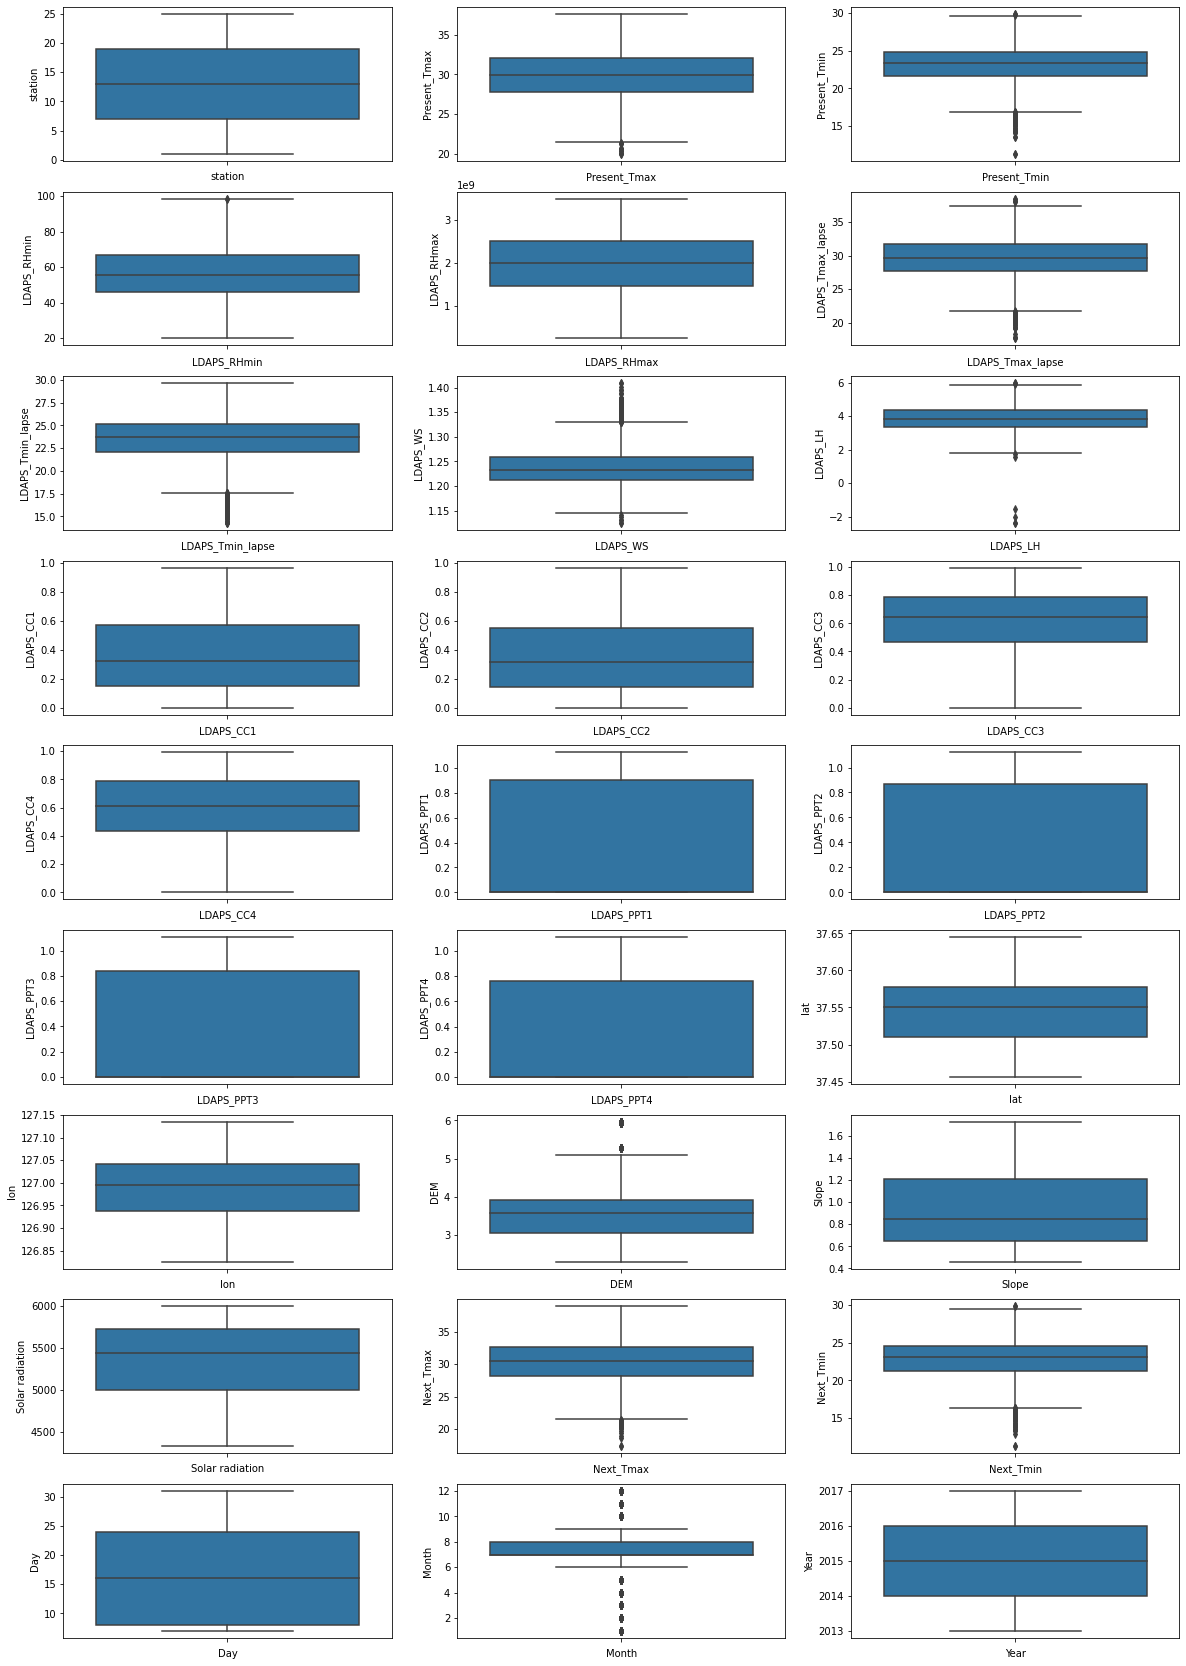

In [34]:
n=1
plt.figure(figsize=(20,30))

for i in df1.columns:
    ax=plt.subplot(9,3,n)
    sns.boxplot(y=df1[i])
    plt.xlabel(i)
    n=n+1
    
plt.show()    

In [35]:
df1.Month.unique()

array([ 6.,  1.,  2.,  3.,  4.,  5.,  7.,  8.,  9., 10., 11., 12.])

Outliers are present in features Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, DEM, Next_Tmin.


In [36]:
from scipy.stats import zscore

cols=['Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'DEM', 'Next_Tmin']
zscore=np.abs(zscore(df1[cols]))

In [37]:
df2=df1[(zscore<3).all(axis=1)]
df2.shape

(7564, 27)

Let's check correlation among features and label.

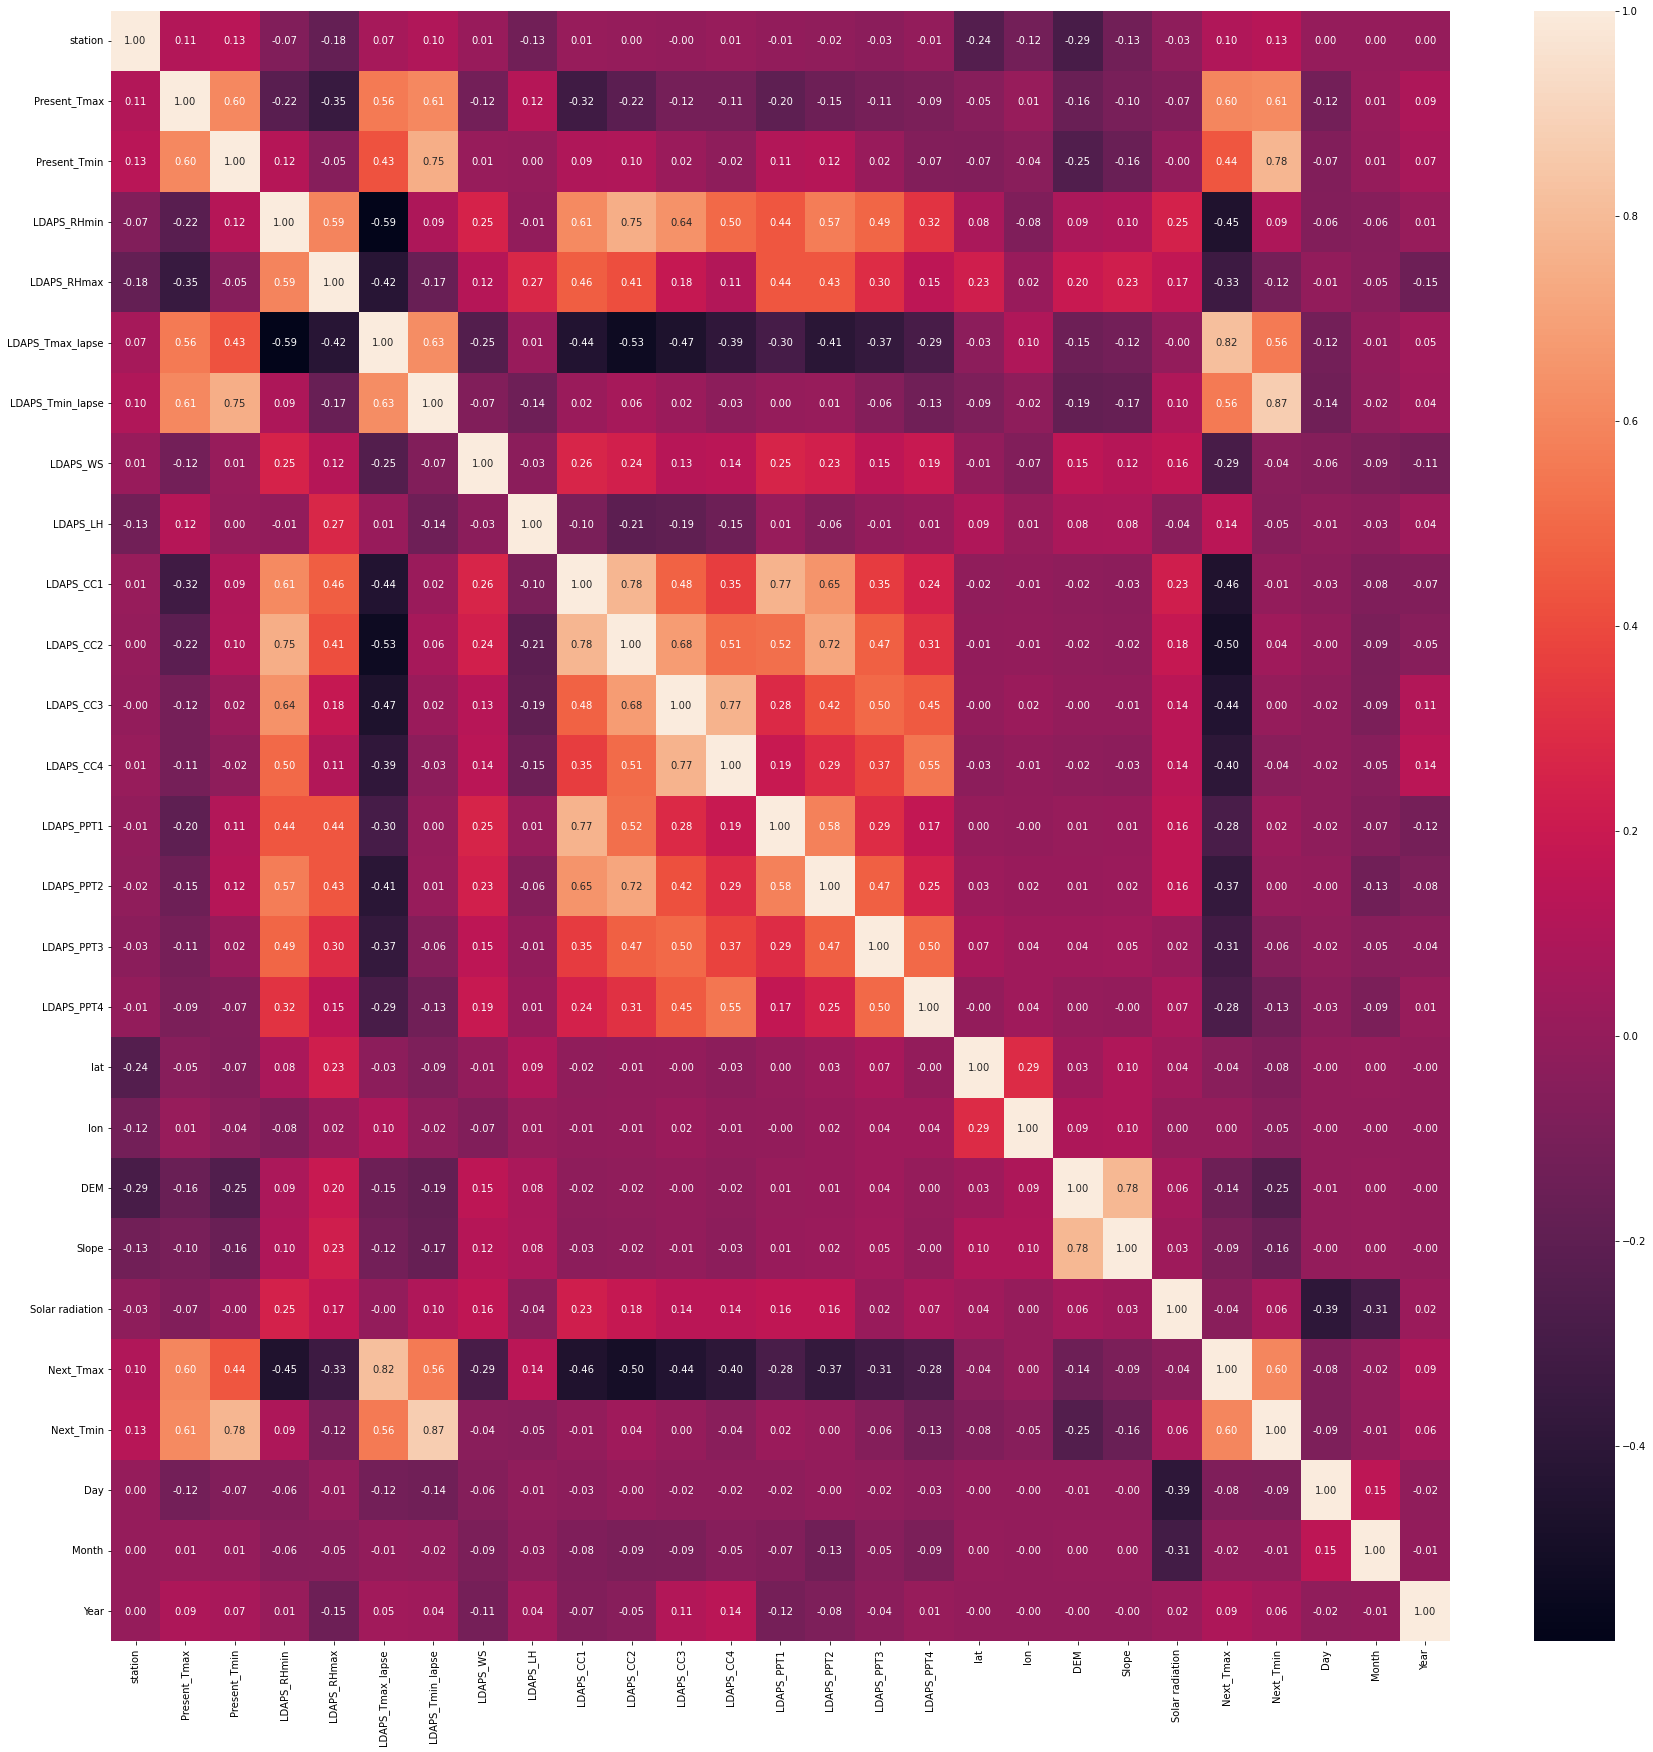

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

All the features are positively and negatively correlated with target variable. Correlation values for few features are high.

Let's check for multi collinearity problem.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=df2.drop('Next_Tmax',axis=1)
y=df2['Next_Tmax']
x_scaled=scaler.fit_transform(x)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
VIF

,features,value
0,station,1.243442
1,Present_Tmax,2.795884
2,Present_Tmin,3.307016
3,LDAPS_RHmin,6.687546
4,LDAPS_RHmax,2.668476
5,LDAPS_Tmax_lapse,7.152344
6,LDAPS_Tmin_lapse,8.510851
7,LDAPS_WS,1.255372
8,LDAPS_LH,1.474769
9,LDAPS_CC1,5.466028


As per my observation from heatmap and VIF value, let's drop these features 'Present_Tmin', 'LDAPS_Tmin_lapse', 'DEM', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3'.

In [42]:
x.drop(['Present_Tmin', 'LDAPS_Tmin_lapse', 'DEM', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3'],axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)


VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
VIF

,features,value
0,station,1.118316
1,Present_Tmax,2.220892
2,LDAPS_RHmin,4.556267
3,LDAPS_RHmax,2.530391
4,LDAPS_Tmax_lapse,4.315614
5,LDAPS_WS,1.211216
6,LDAPS_LH,1.306241
7,LDAPS_CC4,1.962019
8,LDAPS_PPT1,1.702322
9,LDAPS_PPT2,2.110114


Let's find best RandomState.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [90]:
max_rvalue=0
max_randstate=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_predict=LR.predict(x_test)
    r_value=r2_score(y_test,y_predict)
    if(r_value>max_rvalue):
        max_rvalue=r_value
        max_randstate=i
        
    
print('Best random state : ',max_randstate) 
print('r2 score :',max_rvalue)

Best random state :  92
r2 score : 0.7816220801071644


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=92)

In [92]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [93]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
r_value_LR=r2_score(y_test,y_predict_LR)
print("R2 score ",r_value_LR)

R2 score  0.7816220802925482


In [94]:
L=Lasso()
L.fit(x_train,y_train)
y_predict_L=L.predict(x_test)
r_value_L=r2_score(y_test,y_predict_L)
print("R2 score ",r_value_L)

R2 score  0.7081913281304753


In [95]:
R=Ridge()
R.fit(x_train,y_train)
y_predict_R=R.predict(x_test)
r_value_R=r2_score(y_test,y_predict_R)
print('R2 score ',r_value_R)

R2 score  0.781722957925375


In [96]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_predict_DTR=DTR.predict(x_test)
r_value_DTR=r2_score(y_test,y_predict_DTR)
print('R2 score ',r_value_DTR)

R2 score  0.7666793962837306


In [97]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
y_predict_KNR=KNR.predict(x_test)
r_value_KNR=r2_score(y_test,y_predict_KNR)
print('R2 score  ',r_value_KNR)

R2 score   -0.012723300862885756


In [98]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
y_predict_RFR=RFR.predict(x_test)
r_value_RFR=r2_score(y_test,y_predict_RFR)
print('R2 score ',r_value_RFR)

R2 score  0.9119463196409424


In [99]:
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_predict_ETR=ETR.predict(x_test)
r_value_ETR=r2_score(y_test,y_predict_ETR)
print('R2 score ',r_value_ETR)

R2 score  0.7831827191006155


From the above we can observe RandomForestRegressor exhibits highest R2 score of 91%. Let's check R2 score provided by the model is due to overfitting of the model.

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
score=cross_val_score(LR,x,y)
print("cross validation score is ", r_value_LR-score.mean())

cross validation score is  0.11941806448296666


In [102]:
score=cross_val_score(DTR,x,y)
print("Difference is ",r_value_DTR-score.mean())

Difference is  0.3145424275330126


In [103]:
score=cross_val_score(KNR,x,y)
print("Difference is ",r_value_KNR-score.mean())

Difference is  0.10687325753648576


In [104]:
score=cross_val_score(L,x,y)
print("Difference is ",r_value_L-score.mean())

Difference is  0.07952227374492515


In [105]:
score=cross_val_score(R,x,y)
print("Difference is ",r_value_R-score.mean())

Difference is  0.12073411802744627


In [106]:
score=cross_val_score(RFR,x,y)
print("Difference is ",r_value_RFR-score.mean())

Difference is  0.214278428643088


In [107]:
score=cross_val_score(ETR,x,y)
print("Difference is ",r_value_ETR-score.mean())

Difference is  0.45895453241795986


From the above we can observe Lasso model has less cross validation score value.

Let's generate MeanAbsoluteError, MeanSquaredError.

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [109]:
print('R2 score - ',r2_score(y_test,y_predict_L))
print("Mean Squared Error", mean_squared_error(y_test,y_predict_L))
print("Root Mean Squared Error ",np.sqrt(mean_squared_error(y_test,y_predict_L)))
print("Mean Absolute Error ",mean_absolute_error(y_test,y_predict_L))

R2 score -  0.7081913281304753
Mean Squared Error 2.7842076731974768
Root Mean Squared Error  1.6685945203066792
Mean Absolute Error  1.3000645842704313


Let's tune parameters and try to increase R2 score.

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid={'selection':['cyclic', 'random'],
           'fit_intercept':['True','False'],
           'max_iter':[1000,1100,1200,1300],
           'alpha':[.2,.5,1]}

In [68]:
GSV=GridSearchCV(L,param_grid=param_grid,n_jobs=-1)
GSV.fit(x_train,y_train)
GSV.best_params_

{'alpha': 0.2,
 'fit_intercept': 'False',
 'max_iter': 1300,
 'selection': 'random'}

In [110]:
Best_model=Lasso(alpha=0.2,fit_intercept=False,max_iter=1400,selection='random')
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
value=r2_score(y_test,y_predict)
print('R2 score : ',value)

R2 score :  0.7445714821060379


After parameter tuning R2 score increased to 74.4%.

In [ ]:
import pickle
pickle.dump('Best_model',open('Max_Temperature_Forecast','wb'))

TASK -2 (FINDING Next_Tmax)

In [111]:
df1=pd.DataFrame()
df1=df
df1['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [112]:
df1.dropna(axis=0,inplace=True)

In [113]:
df1.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

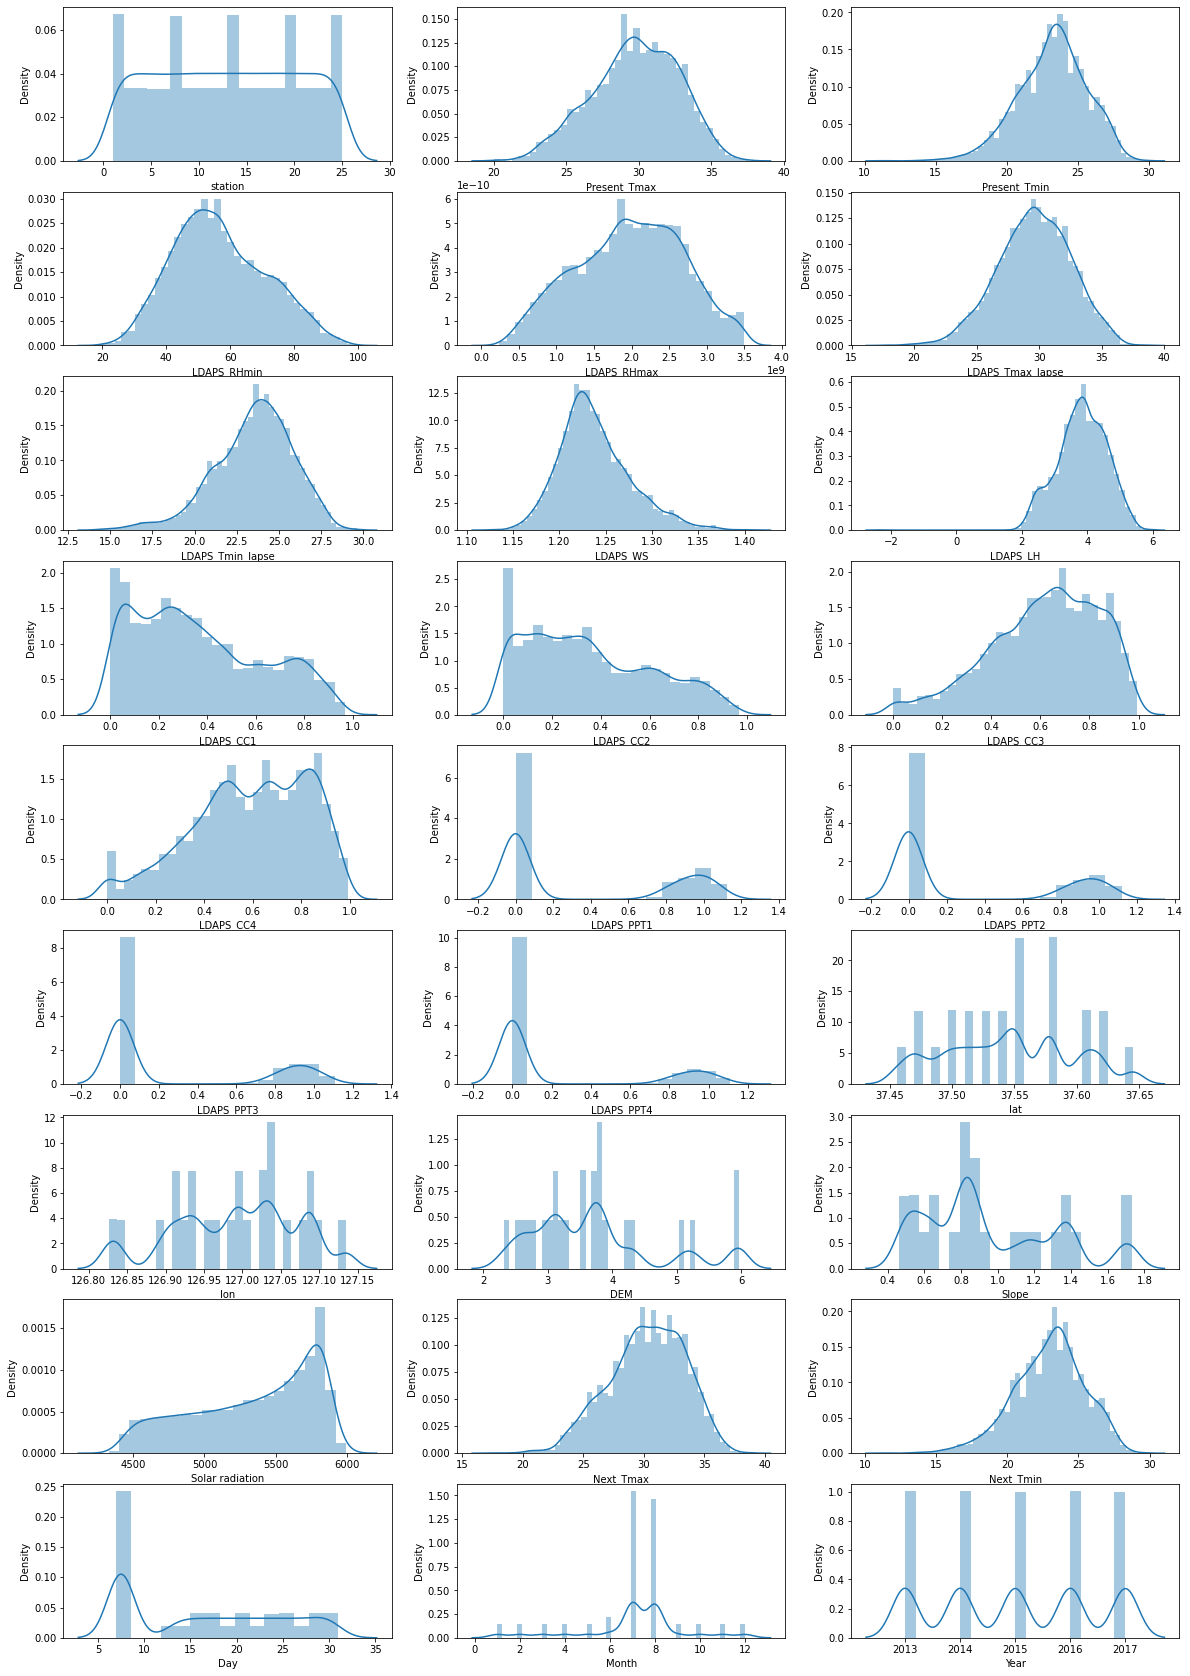

In [114]:
n=1
plt.figure(figsize=(20,30))

for i in df1.columns:
    ax=plt.subplot(9,3,n)
    sns.distplot(x=df1[i])
    plt.xlabel(i)
    n=n+1
    
plt.show()    

In [115]:
df1.skew()

station            -0.002671
Present_Tmax       -0.264750
Present_Tmin       -0.366521
LDAPS_RHmin         0.302959
LDAPS_RHmax        -0.116045
LDAPS_Tmax_lapse   -0.227408
LDAPS_Tmin_lapse   -0.580647
LDAPS_WS            0.678491
LDAPS_LH           -0.415327
LDAPS_CC1           0.460552
LDAPS_CC2           0.475215
LDAPS_CC3          -0.571865
LDAPS_CC4          -0.468168
LDAPS_PPT1          0.563036
LDAPS_PPT2          0.743135
LDAPS_PPT3          0.828504
LDAPS_PPT4          1.145049
lat                 0.086587
lon                -0.286558
DEM                 0.919318
Slope               0.613201
Solar radiation    -0.513787
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Day                 0.245795
Month              -0.704300
Year                0.002471
dtype: float64

From the above we can observe skeweness values for features LDAPS_WS, LDAPS_PPT2,LDAPS_PPT3, LDAPS_PPT4, DEM, Slope.

In [116]:
from scipy.stats import boxcox



df1['LDAPS_WS']=np.log(df1['LDAPS_WS'])

df1['LDAPS_PPT2']=np.cbrt(df1['LDAPS_PPT2'])
df1['LDAPS_PPT2']=np.cbrt(df1['LDAPS_PPT2'])

df1['LDAPS_PPT3']=np.cbrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT3']=np.cbrt(df1['LDAPS_PPT3'])

df1['LDAPS_PPT4']=np.cbrt(df1['LDAPS_PPT4'])
df1['LDAPS_PPT4']=np.cbrt(df1['LDAPS_PPT4'])

df1['DEM']=np.cbrt(df1['DEM'])
df1['DEM']=np.cbrt(df1['DEM'])

df1['Slope']=np.cbrt(df1['Slope'])



df1.skew()

station            -0.002671
Present_Tmax       -0.264750
Present_Tmin       -0.366521
LDAPS_RHmin         0.302959
LDAPS_RHmax        -0.116045
LDAPS_Tmax_lapse   -0.227408
LDAPS_Tmin_lapse   -0.580647
LDAPS_WS            0.578093
LDAPS_LH           -0.415327
LDAPS_CC1           0.460552
LDAPS_CC2           0.475215
LDAPS_CC3          -0.571865
LDAPS_CC4          -0.468168
LDAPS_PPT1          0.563036
LDAPS_PPT2          0.699209
LDAPS_PPT3          0.788434
LDAPS_PPT4          1.105436
lat                 0.086587
lon                -0.286558
DEM                 0.468639
Slope               0.250348
Solar radiation    -0.513787
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Day                 0.245795
Month              -0.704300
Year                0.002471
dtype: float64

After trying multiple times for reducing skeweness, skew value for few features are not getting reduced.

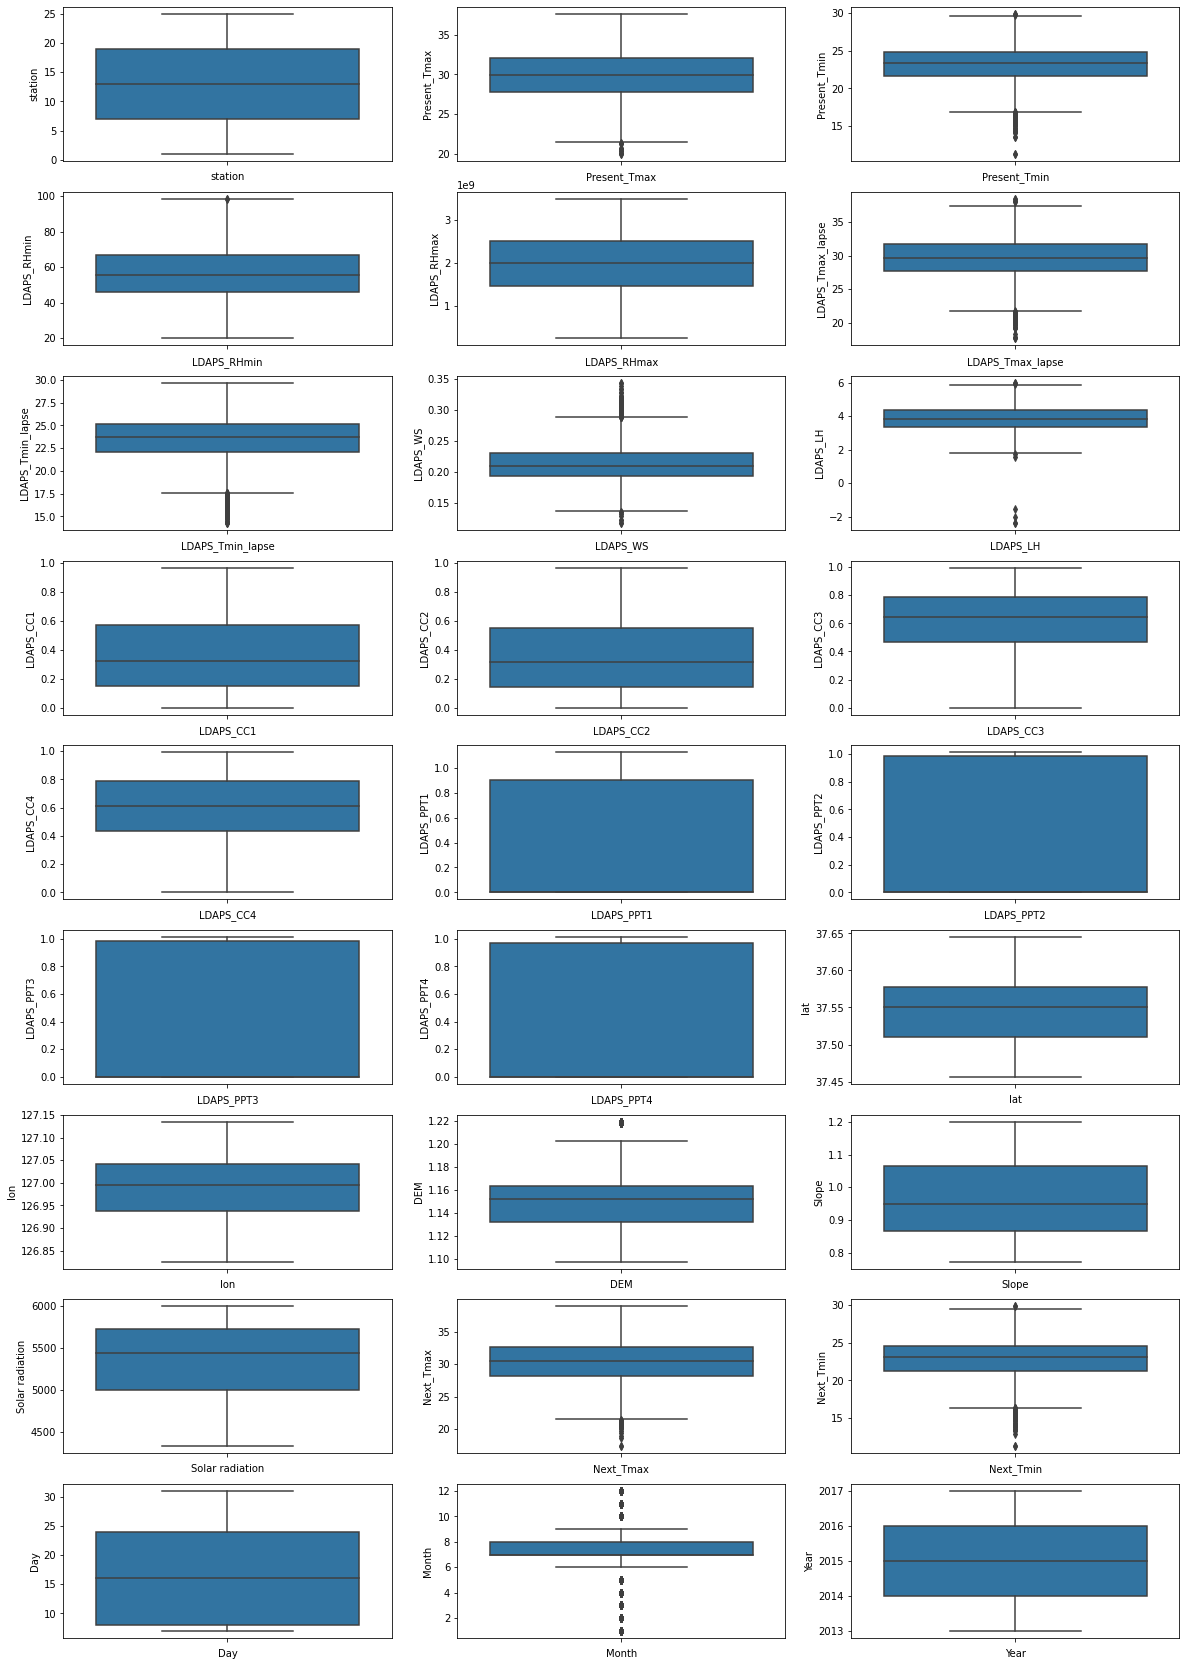

In [117]:
n=1
plt.figure(figsize=(20,30))

for i in df1.columns:
    ax=plt.subplot(9,3,n)
    sns.boxplot(y=df1[i])
    plt.xlabel(i)
    n=n+1
    
plt.show()    

Outliers are present in features Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, DEM, Next_Tmax.


In [118]:
cols=['Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'DEM', 'Next_Tmax']
from scipy.stats import zscore
zscore=np.abs(zscore(df[cols]))
df2=df1[(zscore<3).all(axis=1)]
df2.shape

(7576, 27)

Let's check for the correlation among features and labels.

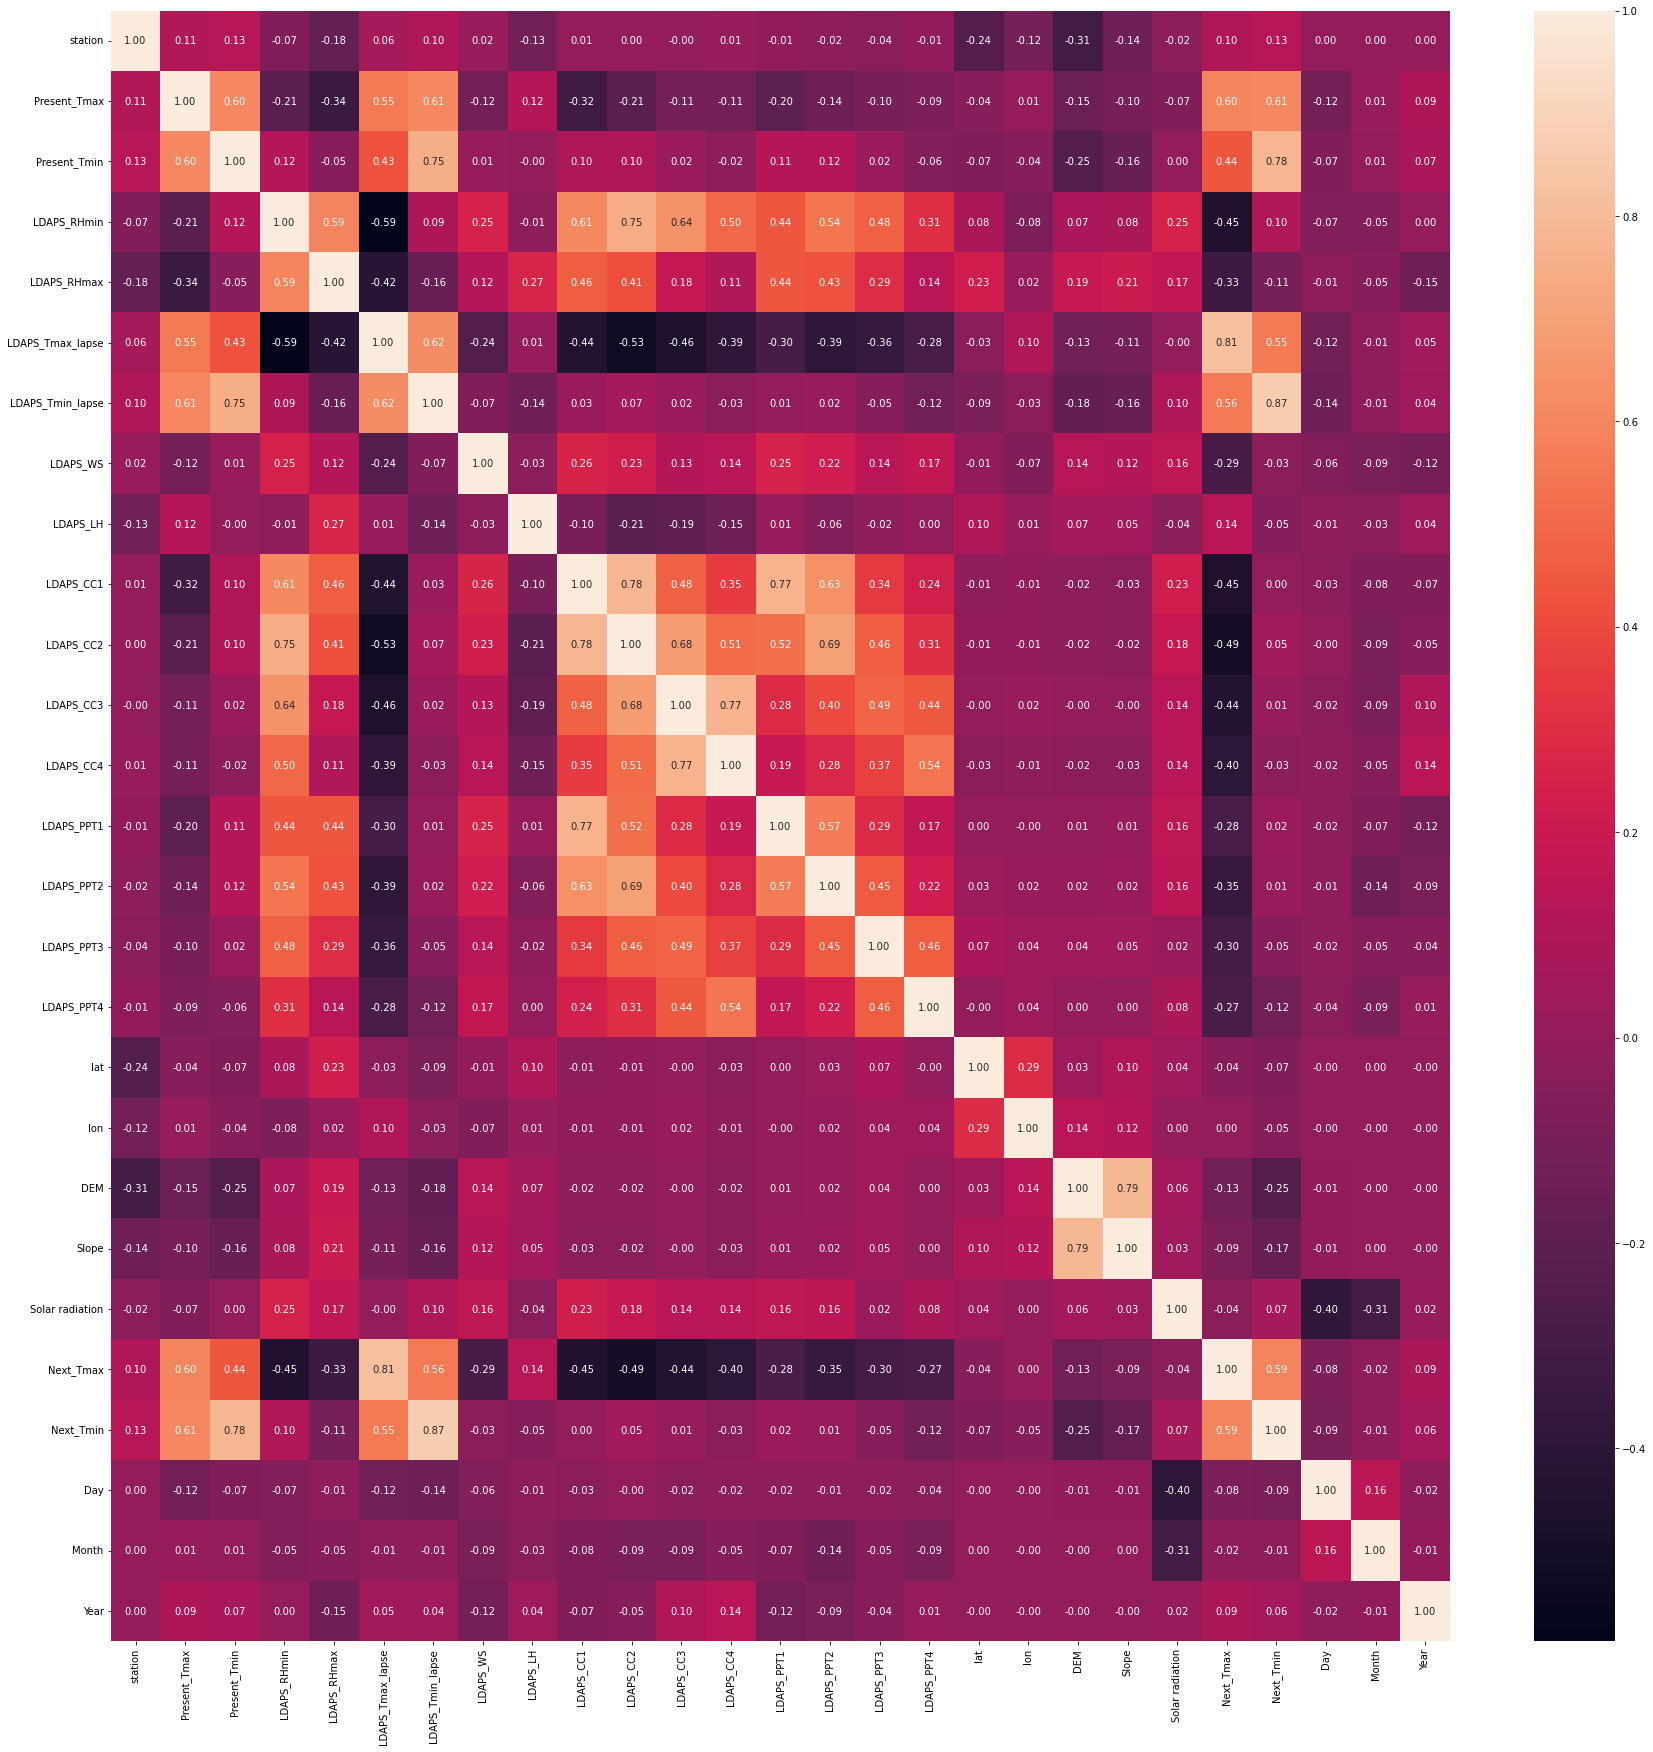

In [119]:
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

All the features are positively and negatively correlated with target variable and with each other.

Let's check for multi collinearity problem in the features.

In [120]:
from sklearn.preprocessing import StandardScaler

x=df2.drop('Next_Tmin',axis=1)
y=df2['Next_Tmin']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
VIF

,features,value
0,station,1.272529
1,Present_Tmax,2.855415
2,Present_Tmin,3.010513
3,LDAPS_RHmin,6.680961
4,LDAPS_RHmax,2.664359
5,LDAPS_Tmax_lapse,8.511259
6,LDAPS_Tmin_lapse,6.695476
7,LDAPS_WS,1.272254
8,LDAPS_LH,1.504816
9,LDAPS_CC1,5.499516


As per my analysis from heatmap and VIF value let's drop 'LDAPS_Tmax_lapse','DEM','LDAPS_CC1','LDAPS_CC4' features.

In [126]:
x.drop(['LDAPS_Tmax_lapse','DEM','LDAPS_CC1','LDAPS_CC4','LDAPS_Tmax_lapse'],axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

In [128]:
x.shape

(7576, 22)

In [129]:
VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
VIF

,features,value
0,station,1.124440
1,Present_Tmax,2.586844
2,Present_Tmin,2.884821
3,LDAPS_RHmin,4.295469
4,LDAPS_RHmax,2.620129
5,LDAPS_Tmin_lapse,3.723438
6,LDAPS_WS,1.258194
7,LDAPS_LH,1.485683
8,LDAPS_CC2,4.261674
9,LDAPS_CC3,2.836722


Let's find the best RandomState.

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [131]:
max_rvalue=0
max_randstate=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_predict=LR.predict(x_test)
    r_value=r2_score(y_test,y_predict)
    if(r_value>max_rvalue):
        max_rvalue=r_value
        max_randstate=i
        
    
print('Best random state : ',max_randstate) 
print('r2 score :',max_rvalue)

Best random state :  40
r2 score : 0.8467261048991783


Best Random State is 40.

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [133]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [134]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
r_value_LR=r2_score(y_test,y_predict_LR)
print("R2 score ",r_value_LR)

R2 score  0.8467261048439346


In [135]:
L=Lasso()
L.fit(x_train,y_train)
y_predict_L=L.predict(x_test)
r_value_L=r2_score(y_test,y_predict_L)
print("R2 score ",r_value_L)

R2 score  0.79548923368151


In [136]:
R=Ridge()
R.fit(x_train,y_train)
y_predict_R=R.predict(x_test)
r_value_R=r2_score(y_test,y_predict_R)
print('R2 score ',r_value_R)

R2 score  0.8466251493903155


In [137]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_predict_DTR=DTR.predict(x_test)
r_value_DTR=r2_score(y_test,y_predict_DTR)
print('R2 score ',r_value_DTR)

R2 score  0.8095090579650907


In [138]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
y_predict_KNR=KNR.predict(x_test)
r_value_KNR=r2_score(y_test,y_predict_KNR)
print('R2 score  ',r_value_KNR)

R2 score   -0.1522603322774596


In [139]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
y_predict_RFR=RFR.predict(x_test)
r_value_RFR=r2_score(y_test,y_predict_RFR)
print('R2 score ',r_value_RFR)

R2 score  0.9147908325035576


In [140]:
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_predict_ETR=ETR.predict(x_test)
r_value_ETR=r2_score(y_test,y_predict_ETR)
print('R2 score ',r_value_ETR)

R2 score  0.7824645046536955


From the above we can observe, RandomForestRegressor provides highest r2score. Let's check accuracy score provided by the model is due to overfitting of the model.

In [141]:
score=cross_val_score(LR,x,y)
print("cross validation score is ", r_value_LR-score.mean())

cross validation score is  0.0722620636812491


In [142]:
score=cross_val_score(DTR,x,y)
print("Difference is ",r_value_DTR-score.mean())

Difference is  0.2478471195512888


In [143]:
score=cross_val_score(KNR,x,y)
print("Difference is ",r_value_KNR-score.mean())

Difference is  0.2787510407194694


In [144]:
score=cross_val_score(L,x,y)
print("Difference is ",r_value_L-score.mean())

Difference is  0.07497988134403599


In [145]:
score=cross_val_score(R,x,y)
print("Difference is ",r_value_R-score.mean())

Difference is  0.0717094525683355


In [146]:
score=cross_val_score(RFR,x,y)
print("Difference is ",r_value_RFR-score.mean())

Difference is  0.13536691721556227


In [147]:
score=cross_val_score(ETR,x,y)
print("Difference is ",r_value_ETR-score.mean())

Difference is  0.270287348123441


From the above we can observe LinearRegression and Ridge Regression has less cross validation score. We can consider any one modelfor this dataset.

Let's consider LinearRegression.

In [148]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("R2 score ",r_value_LR)
print("Mean Absolute Error ",mean_absolute_error(y_test,y_predict_LR))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict_LR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,y_predict_LR)))

R2 score  0.8467261048439346
Mean Absolute Error  0.7492268339754788
Mean Squared Error  0.8963801461924286
Root mean squared error  0.9467735453594109


Let's tune parameters and try to increase r2 score.

In [149]:
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid={'copy_X':['True','False'],
           'fit_intercept':['True','False'],
           }

In [152]:
GSV=GridSearchCV(LR,param_grid=param_grid,n_jobs=-1)
GSV.fit(x_train,y_train)
GSV.best_params_

{'copy_X': 'True', 'fit_intercept': 'True'}

In [153]:
Best_model=LinearRegression(fit_intercept=True,copy_X=True)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
r_value=r2_score(y_test,y_predict)
print("R2 score : ",r_value)

R2 score :  0.8467261048439346


After tuning parameters, r2 score is not changed. Let's consider this as best R2 score for the dataset.

Let's save the model.

In [154]:
import pickle
pickle.dump('Best_model',open('Min_Temperature_Forecast','wb'))